In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

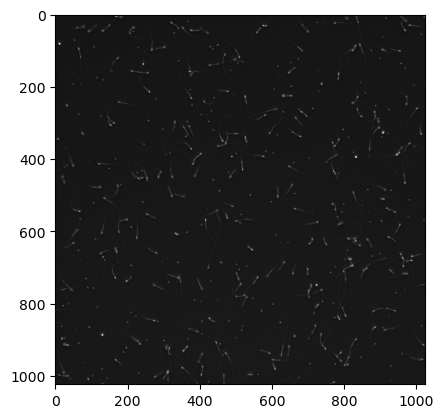

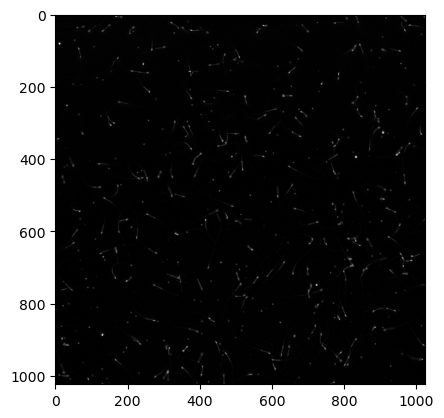

In [2]:
importlib.reload(tracker)

videofile = "ExampleVideos/10X_LD_1024_R1.avi"
#videofile = "ExampleVideos/20X_MD_R5.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame); plt.show()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mid_val = np.median(gray)
plt.imshow(np.abs(gray-mid_val),cmap='gray'); plt.show()



In [1]:
importlib.reload(tracker)

import trackpy as tp

f = tp.locate(gray, 11, minmass=1000)
#f = tracker.determineCentroids_morphology(np.expand_dims(frame,0))

print(f.head())

# Visualize
tp.annotate(f, gray)

NameError: name 'importlib' is not defined

### Feed through the tracking pipeline

In [41]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

Frame 499: 419 trajectories present.
            y           x         mass      size       ecc     signal  \
0  711.769841  798.759463  1074.533618  2.031648  0.131896  79.376415   
1  711.000999  598.101898   656.659433  2.969879  0.618657  30.176158   
2  709.820089  928.341386  1031.893395  2.662399  0.480111  53.792281   
3  706.531780  509.604873   619.267238  1.900323  0.066527  44.608233   
4  705.619266  699.021407  1287.078729  2.372004  0.291839  74.128388   

   raw_mass        ep  frame  sperm  
0    4338.0  0.014547      0      1  
1    3291.0  0.025457      0      2  
2    4215.0  0.015318      0      3  
3    2965.0  0.033214      0      5  
4    4577.0  0.013250      0      6  


In [42]:
importlib.reload(tracker)
importlib.reload(utils)

final = tracker.segmentCells(frames, t)

print(final.head())

100%|██████████| 500/500 [01:03<00:00,  7.83it/s]


            y           x         mass      size       ecc     signal  \
0  711.769841  798.759463  1074.533618  2.031648  0.131896  79.376415   
1  711.000999  598.101898   656.659433  2.969879  0.618657  30.176158   
2  709.820089  928.341386  1031.893395  2.662399  0.480111  53.792281   
3  706.531780  509.604873   619.267238  1.900323  0.066527  44.608233   
4  705.619266  699.021407  1287.078729  2.372004  0.291839  74.128388   

   raw_mass        ep  frame  sperm  area  bbox_x  bbox_y  bbox_w  bbox_h  \
0    4338.0  0.014547      0      1   152     797     683      30      32   
1    3291.0  0.025457      0      2    81     585     694      29      34   
2    4215.0  0.015318      0      3    57     925     707      16      16   
3    2965.0  0.033214      0      5    18     508     704       4       6   
4    4577.0  0.013250      0      6    71     696     701       7      22   

                                        segmentation  
0  [[683, 816], [684, 816], [684, 817], [68

In [43]:
utils.saveDataFrame(final, videofile.split('.')[0] + '_tracked.csv')

### Feed through the statistics pipeline

In [44]:
importlib.reload(stats)

final_withstats = stats.calcAverageSpeed(final)

print(final_withstats.head())

            y           x         mass      size       ecc     signal  \
0  711.769841  798.759463  1074.533618  2.031648  0.131896  79.376415   
1  711.000999  598.101898   656.659433  2.969879  0.618657  30.176158   
2  709.820089  928.341386  1031.893395  2.662399  0.480111  53.792281   
3  706.531780  509.604873   619.267238  1.900323  0.066527  44.608233   
4  705.619266  699.021407  1287.078729  2.372004  0.291839  74.128388   

   raw_mass        ep  frame  sperm  area  bbox_x  bbox_y  bbox_w  bbox_h  \
0    4338.0  0.014547      0      1   152     797     683      30      32   
1    3291.0  0.025457      0      2    81     585     694      29      34   
2    4215.0  0.015318      0      3    57     925     707      16      16   
3    2965.0  0.033214      0      5    18     508     704       4       6   
4    4577.0  0.013250      0      6    71     696     701       7      22   

                                        segmentation  average_speed  
0  [[683, 816], [684, 816], 

In [45]:
utils.saveDataFrame(final_withstats, videofile.split('.')[0] + '_tracked_withstats.csv')

### Use Visualizations

In [46]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final_withstats, visualization="segments")

Video Finished.


In [47]:
importlib.reload(utils)

# Comparison
final1 = utils.loadDataFrame(videofile.split('.')[0] + '_tracked_morph_withstats.csv')
final2 = utils.loadDataFrame(videofile.split('.')[0] + '_tracked_tp_withstats.csv')

Video Finished.
Video Finished.


In [ ]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final1, visualization="segments")
visualizer.runVisualization(videofile, final2, visualization="segments")